reaction network
reaction:  reactants             ->  products      
r1      :  1 b1                  ->  1 b1  + 1 a1  
r2      :  1 b2                  ->  1 b2  + 1 a2  
r3      :  1 b3                  ->  1 b3  + 1 a3  
r4      :  1 b2  + 1 b3          ->  2 b3          
r5      :  1 b1  + 1 a2          ->                
r6      :  1 b1  + 1 b3          ->  2 b2          
r7      :  1 a1  + 1 a2          ->                
r8      :  1 a1  + 1 a2  + 1 a3  ->  1 d1          
r9      :  1 d1  + 1 b1          ->  2 b1  + 1 a2  

speciesset: {'b2', 'b1', 'a1', 'a2', 'd1', 'b3', 'a3'}

ERCs: r1 : ['r1']
r2 : ['r2']
r3 : ['r3']
r4 : ['r4', 'r2', 'r3']
r5 : ['r5', 'r1', 'r7']
r6 : ['r6', 'r4', 'r8', 'r9']
r7 : ['r7']
r8 : ['r8', 'r7']
r9 : ['r9', 'r5']

Restricted license - for non-production use only - expires 2024-10-28
Time taken to solve LP: 0.007999897003173828 seconds
The model has an optimal solution with objective value 7.0
54
Time taken to solve LP: 0.004000186920166016 seconds

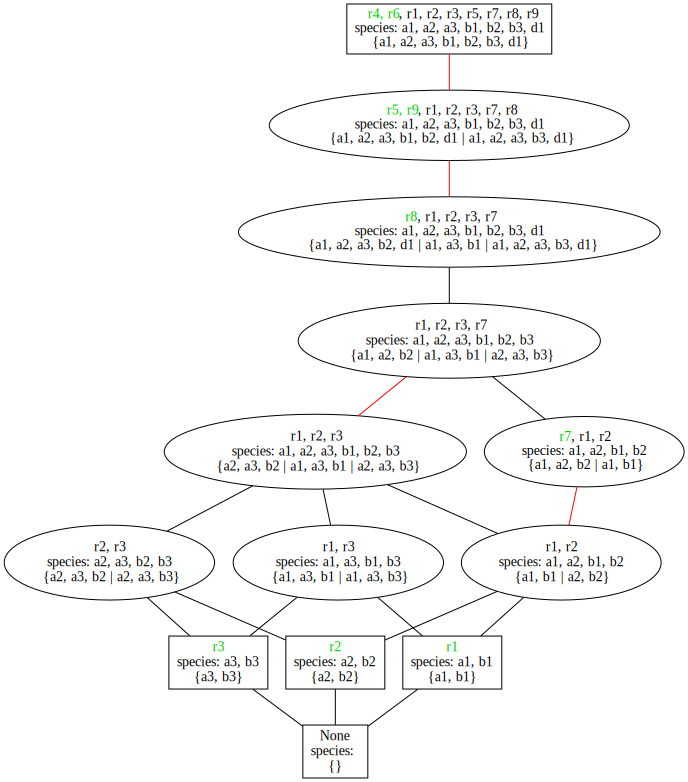

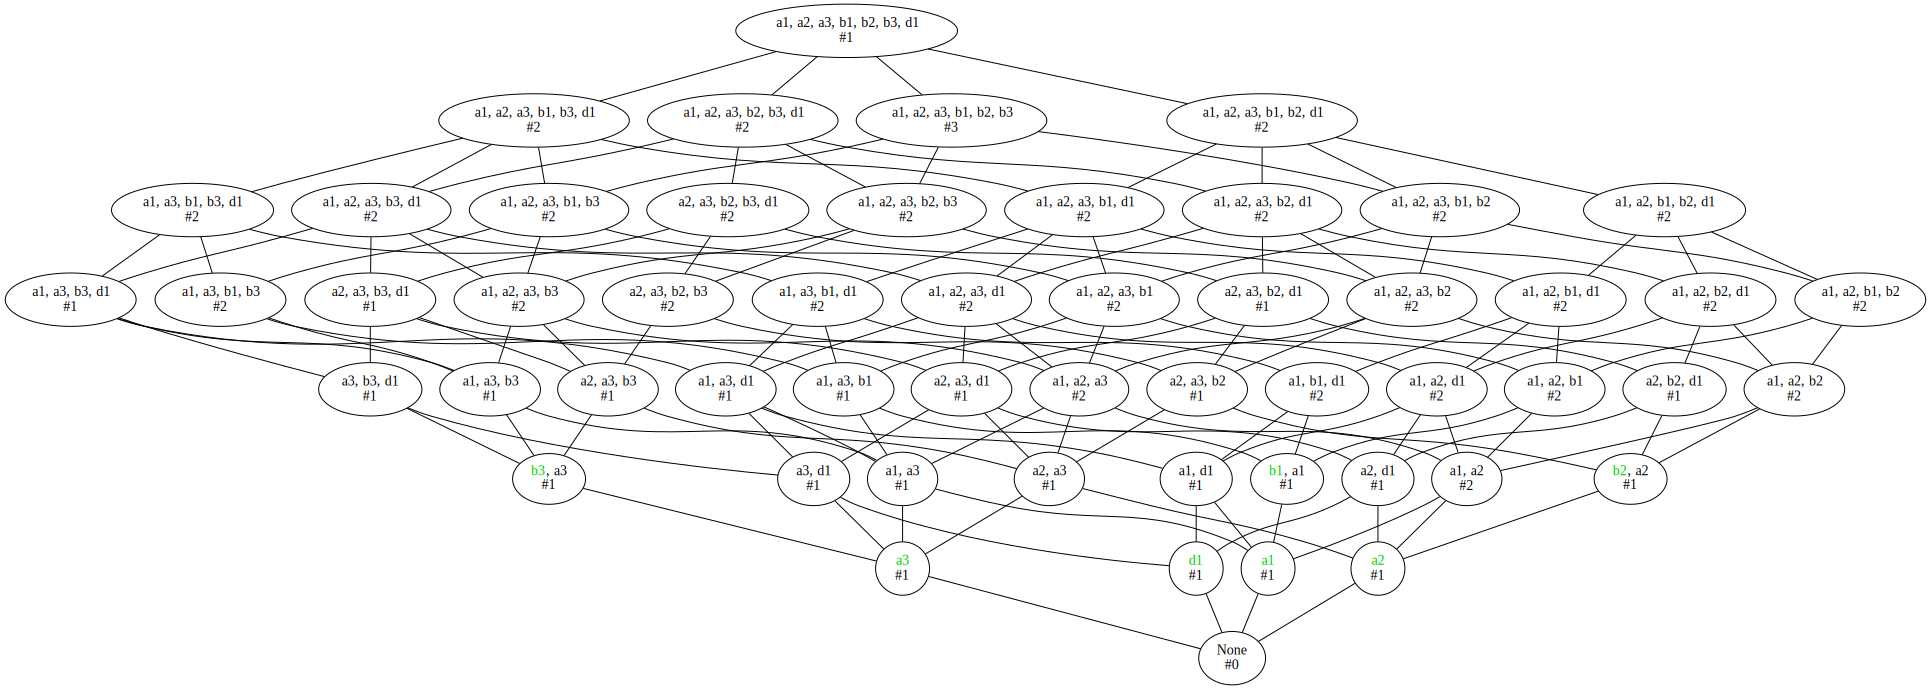

In [1]:
from Analysis import *
from reactionnetwork import *

import time

example=get_example()
print("reaction network")
print(example)
print()

analysis=Analysis(example)
#print ERCs
analysis.get_ERCs()
analysis.print_ERC()


#calculate DOs
allDOs=analysis.all_DOs()
print(len(allDOs))

#calculate SORs
allSORs=analysis.all_SORs()
print(allSORs)
#print(analysis.OP_map)




SOR_graph=analysis.draw_SORs(show_compartments=True, show_species=True, show_overproduction=True)
print()
print()
#get specific solution of DOs or SORs and get the set of contrerary elements, which can solve for that
#SOR
largestSOR=allSORs[-1]
DOs_of_largest_SOR=analysis.get_DOs_of_SOR(largestSOR)
print("DO subset")
print(DOs_of_largest_SOR)



#DO
largestDO=allDOs[0]
SORs_of_largest_DO=analysis.get_SORs_of_DO(largestDO)
print("SOR subset")
print(SORs_of_largest_DO)
print()

#use function to get compartmentalization
comp=analysis.get_compartmentalization_of_SOR_DO_pair(allSORs[5])
print(comp)

#you can also print the MRCs
print(analysis.MCs)

#print of hasse
analysis.draw_DOs(DOs_of_largest_SOR)
time.sleep(0.5)
SOR_graph=analysis.draw_SORs(show_compartments=True, show_species=True,show_overproduction=True)
SOR_graph=analysis.draw_SORs(show_compartments=True, show_species=True,show_overproduction=False)
#print(SOR_graph)
display(SOR_graph)

DO_graph=analysis.draw_DOs()
display(DO_graph)